In [151]:
import pandas as pd 
import tensorflow as tf
import tensorflow.keras as keras
import string
from keras.preprocessing import sequence
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Embedding
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
data = pd.read_csv("/content/kan.txt", sep="\t")

In [153]:
data.columns = ["Eng", "Kan", "desc"]

In [154]:
data.head()

,Eng,Kan,desc
0,How are you?,ಹೇಗಿದ್ದೀರ,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
1,Tom woke up.,ಟಾಮ್ ಏಳಿದನು.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Give me half.,ಅರ್ಧ ನನಗೆ ಕೊಡು.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,We needed it.,ನಮಗೆ ಬೇಕಾಗಿತ್ತು.,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
4,I'm very busy.,ನಾನು ತುಂಬಾ ಬಿಝಿ,CC-BY 2.0 (France) Attribution: tatoeba.org #4...


In [155]:
data.shape

(157, 3)

In [156]:
data.Kan.iloc[1].split()

['ಟಾಮ್', 'ಏಳಿದನು.']

In [157]:
def preprocess_eng(text):
  text = text.lower()
  text = text.translate(text.maketrans('','',string.punctuation))
  return text

def preprocess_kan(text):
  text = text.translate(text.maketrans('','',string.punctuation))
  return text


In [158]:
data["Eng"] = data["Eng"].apply(preprocess_eng)
data["Kan"] = data["Kan"].apply(preprocess_kan)

In [159]:
data.head()

,Eng,Kan,desc
0,how are you,ಹೇಗಿದ್ದೀರ,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
1,tom woke up,ಟಾಮ್ ಏಳಿದನು,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,give me half,ಅರ್ಧ ನನಗೆ ಕೊಡು,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
3,we needed it,ನಮಗೆ ಬೇಕಾಗಿತ್ತು,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
4,im very busy,ನಾನು ತುಂಬಾ ಬಿಝಿ,CC-BY 2.0 (France) Attribution: tatoeba.org #4...


In [160]:
data.drop("desc", inplace=True, axis=1)

In [161]:
data.head()

,Eng,Kan
0,how are you,ಹೇಗಿದ್ದೀರ
1,tom woke up,ಟಾಮ್ ಏಳಿದನು
2,give me half,ಅರ್ಧ ನನಗೆ ಕೊಡು
3,we needed it,ನಮಗೆ ಬೇಕಾಗಿತ್ತು
4,im very busy,ನಾನು ತುಂಬಾ ಬಿಝಿ


In [162]:
data["target_kan"] = data["Kan"]

In [163]:
data.head()

,Eng,Kan,target_kan
0,how are you,ಹೇಗಿದ್ದೀರ,ಹೇಗಿದ್ದೀರ
1,tom woke up,ಟಾಮ್ ಏಳಿದನು,ಟಾಮ್ ಏಳಿದನು
2,give me half,ಅರ್ಧ ನನಗೆ ಕೊಡು,ಅರ್ಧ ನನಗೆ ಕೊಡು
3,we needed it,ನಮಗೆ ಬೇಕಾಗಿತ್ತು,ನಮಗೆ ಬೇಕಾಗಿತ್ತು
4,im very busy,ನಾನು ತುಂಬಾ ಬಿಝಿ,ನಾನು ತುಂಬಾ ಬಿಝಿ


In [164]:
# adding start and end token for english 

def add_tokens(text):
  return "<start> "+text+" <end>"

data.Eng = data.Eng.apply(add_tokens) 


def add_start(text):
  return '<start> '+text

def add_end(text):
  return text+' <end>'

data.Kan = data.Kan.apply(add_start)
 
data.target_kan = data.target_kan.apply(add_end)

In [165]:
data.head()

,Eng,Kan,target_kan
0,<start> how are you <end>,<start> ಹೇಗಿದ್ದೀರ,ಹೇಗಿದ್ದೀರ <end>
1,<start> tom woke up <end>,<start> ಟಾಮ್ ಏಳಿದನು,ಟಾಮ್ ಏಳಿದನು <end>
2,<start> give me half <end>,<start> ಅರ್ಧ ನನಗೆ ಕೊಡು,ಅರ್ಧ ನನಗೆ ಕೊಡು <end>
3,<start> we needed it <end>,<start> ನಮಗೆ ಬೇಕಾಗಿತ್ತು,ನಮಗೆ ಬೇಕಾಗಿತ್ತು <end>
4,<start> im very busy <end>,<start> ನಾನು ತುಂಬಾ ಬಿಝಿ,ನಾನು ತುಂಬಾ ಬಿಝಿ <end>


In [166]:
# adding <end> to kan column for adding it to vocabulary 

data.Kan[0] = data.Kan[0]+' <end>'

In [167]:
data.head()

,Eng,Kan,target_kan
0,<start> how are you <end>,<start> ಹೇಗಿದ್ದೀರ <end>,ಹೇಗಿದ್ದೀರ <end>
1,<start> tom woke up <end>,<start> ಟಾಮ್ ಏಳಿದನು,ಟಾಮ್ ಏಳಿದನು <end>
2,<start> give me half <end>,<start> ಅರ್ಧ ನನಗೆ ಕೊಡು,ಅರ್ಧ ನನಗೆ ಕೊಡು <end>
3,<start> we needed it <end>,<start> ನಮಗೆ ಬೇಕಾಗಿತ್ತು,ನಮಗೆ ಬೇಕಾಗಿತ್ತು <end>
4,<start> im very busy <end>,<start> ನಾನು ತುಂಬಾ ಬಿಝಿ,ನಾನು ತುಂಬಾ ಬಿಝಿ <end>


In [168]:
# tokenizing the data 

eng_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', lower=True, split=' ')
eng_tokenizer.fit_on_texts(data.Eng)

kan_tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', split=' ')
kan_tokenizer.fit_on_texts(data.Kan)


In [169]:
kan_tokenizer.word_index

{'end': 101,
 'start': 1,
 'ಅಂತ': 7,
 'ಅಂದಿನಿಂದ': 416,
 'ಅಗ್ನಿಶಾಮಕರು': 423,
 'ಅಡ್ಡಲಾಗಿ': 166,
 'ಅಣ್ಣ': 429,
 'ಅತಿಥಿಗಳನ್ನು': 152,
 'ಅದಕ್ಕಿಂತ': 373,
 'ಅದಕ್ಕೆ': 270,
 'ಅದಕ್ಕೇನೇ': 213,
 'ಅದನ್ನು': 17,
 'ಅದನ್ನೇ': 187,
 'ಅದರ': 131,
 'ಅದಷ್ಟೇ': 146,
 'ಅದು': 244,
 'ಅದೃಷ್ಟ': 212,
 'ಅದೇ': 41,
 'ಅದ್ಭುತವಾಯಿತು': 387,
 'ಅಧಿಕಾರ': 444,
 'ಅನಿಸಿತು': 304,
 'ಅನಿಸುತ್ತಾ': 272,
 'ಅನಿಸುತ್ತೆ': 28,
 'ಅನ್ನಿಸುತ್ತೆ': 219,
 'ಅಪಘಾತದ': 90,
 'ಅಪಘಾತವಾಯಿತು': 208,
 'ಅಪಾಯ': 410,
 'ಅಭಿಪ್ರಾಯವನ್ನು': 183,
 'ಅರ್ಜೆಂಟೀನದ': 413,
 'ಅರ್ಥ': 271,
 'ಅರ್ಧ': 103,
 'ಅಲ್ಲವ': 337,
 'ಅಲ್ಲೇ': 311,
 'ಅಲ್ವ': 400,
 'ಅವನ': 13,
 'ಅವನನ್ನು': 29,
 'ಅವನಿಗೆ': 30,
 'ಅವನು': 10,
 'ಅವರ': 91,
 'ಅವರು': 12,
 'ಅವಳ': 252,
 'ಅವಳನ್ನು': 380,
 'ಅವಳಿಗೆ': 377,
 'ಅವಳು': 32,
 'ಅಷ್ಟೇ': 110,
 'ಅಸಡ್ಡೆ': 137,
 'ಆ': 68,
 'ಆಕರ್ಷಕವಾಗಿದ್ದರೆ': 434,
 'ಆಗಲಿಲ್ಲ': 38,
 'ಆಗಲ್ಲ': 341,
 'ಆಗುವುದಕ್ಕೆ': 360,
 'ಆಗುವುದಿಲ್ಲವೆಂದು': 398,
 'ಆಟ': 204,
 'ಆಡುತ್ತೀರಾ': 205,
 'ಆದರೆ': 408,
 'ಆಫೀಸಿನಿಂದ': 446,
 'ಆಯಿತು': 376,
 'ಆಶಿಸುತ್ತೇನೆ': 163,
 'ಆಹಾರಕ್ಕೆ': 302,
 'ಇಟ್ಟಿದ್ದೇನೆ': 121,
 'ಇಟ್ಟುಕೊಂಡಿದ್ದಾಳೆ'

In [170]:
eng_tokenizer.word_index

{'1825': 360,
 '230': 152,
 'a': 8,
 'about': 70,
 'abroad': 197,
 'accident': 69,
 'across': 180,
 'afraid': 264,
 'after': 390,
 'ago': 192,
 'agreement': 243,
 'agrees': 194,
 'all': 91,
 'almost': 184,
 'always': 200,
 'among': 398,
 'an': 112,
 'and': 49,
 'animals': 263,
 'announced': 132,
 'another': 115,
 'any': 142,
 'anybody': 295,
 'anything': 380,
 'apology': 219,
 'are': 20,
 'argentina': 359,
 'arrived': 274,
 'as': 78,
 'ask': 417,
 'at': 34,
 'awake': 96,
 'away': 145,
 'baby': 285,
 'back': 86,
 'be': 19,
 'beach': 212,
 'because': 407,
 'been': 182,
 'before': 314,
 'believe': 153,
 'believed': 201,
 'better': 233,
 'book': 53,
 'bored': 345,
 'borrow': 416,
 'both': 411,
 'bottles': 406,
 'bought': 303,
 'brazil': 357,
 'brother': 376,
 'brought': 225,
 'bucket': 247,
 'busy': 149,
 'but': 354,
 'buy': 269,
 'by': 161,
 'call': 250,
 'came': 254,
 'can': 21,
 'cant': 309,
 'car': 76,
 'careless': 162,
 'caught': 110,
 'cause': 338,
 'caused': 286,
 'cellar': 405,
 'c

In [171]:
# checking for maximum length for both the languages 

eng_lengths = [len(i) for i in data.Eng.str.split()]

kan_length = [len(i) for i in data.Kan.str.split()]

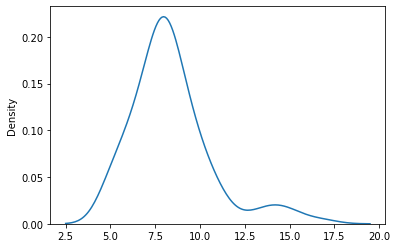

In [172]:
sns.kdeplot(sorted(eng_lengths))

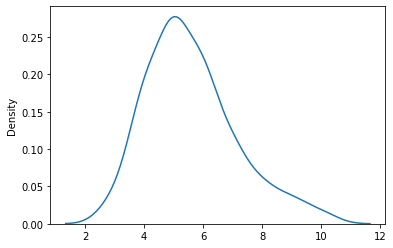

In [173]:
sns.kdeplot(sorted(kan_length))

In [174]:
print("median length values of eng ", np.median(eng_lengths))
print("median length values of kan ", np.median(kan_length))

median length values of eng  8.0
median length values of kan  5.0


In [175]:
max_len_eng = 10
max_len_kan = 7 

In [176]:
eng_vocab_len = len(eng_tokenizer.word_index)
kan_vocab_len = len(kan_tokenizer.word_index)

In [177]:
class Dataset:
  def __init__(self, data, eng_tokenizer, kan_tokenizer, eng_maxlen, kan_maxlen):
    self.eng = data.Eng
    self.kan_input = data.Kan
    self.kan_output = data.target_kan
    self.eng_tokenizer = eng_tokenizer
    self.kan_tokenizer = kan_tokenizer
    self.eng_maxlen = eng_maxlen
    self.kan_maxlen = kan_maxlen


  def __getitem__(self, i):
    
    # tokenizing
    self.eng_sen = eng_tokenizer.texts_to_sequences([self.eng[i]])
    self.kan_input_sen = kan_tokenizer.texts_to_sequences([self.kan_input[i]])
    self.kan_target_sen = kan_tokenizer.texts_to_sequences([self.kan_output[i]])

    # padding

    self.eng_sen = sequence.pad_sequences(self.eng_sen, maxlen=self.eng_maxlen, padding="post", truncating="post")
    self.kan_input_sen = sequence.pad_sequences(self.kan_input_sen, maxlen=self.kan_maxlen, padding="post", truncating="post")
    self.kan_target_sen = sequence.pad_sequences(self.kan_target_sen, maxlen=self.kan_maxlen, padding="post", truncating="post")

    return self.eng_sen, self.kan_input_sen, self.kan_target_sen


class Dataloader(tf.keras.utils.Sequence):
  def __init__(self, dataset, batch_size=1):
    super().__init__()
    self.dataset = dataset
    self.batch_size = batch_size
    self.indexes = np.arange(len(self.dataset.eng))

  def __getitem__(self, i):
    data = []
    start = i*self.batch_size
    stop = (i+1)*self.batch_size

    for ind in range(start, stop):
      data.append(self.dataset[ind])

    batch = [np.squeeze(np.stack(samples, axis=1), axis=0) for samples in zip(*data)]
    # we are creating data like ([italian, english_inp], english_out) these are already converted into seq
    return tuple([[batch[0],batch[1]],batch[2]])

  def __len__(self):  # your model.fit_gen requires this function
    return len(self.indexes) // self.batch_size  

In [178]:
batch_size=3
dataset = Dataset(data, eng_tokenizer, kan_tokenizer, max_len_eng, max_len_kan)
dataloader = Dataloader(dataset, batch_size = batch_size)

In [179]:

for i in dataloader:
  print(i)
  break

([array([[  1,  32,  20,   3,   2,   0,   0,   0,   0,   0],
       [  1,   7, 147,  50,   2,   0,   0,   0,   0,   0],
       [  1,  83,  18, 148,   2,   0,   0,   0,   0,   0]], dtype=int32), array([[  1, 100, 101,   0,   0,   0,   0],
       [  1,   3, 102,   0,   0,   0,   0],
       [  1, 103,   5, 104,   0,   0,   0]], dtype=int32)], array([[100, 101,   0,   0,   0,   0,   0],
       [  3, 102, 101,   0,   0,   0,   0],
       [103,   5, 104, 101,   0,   0,   0]], dtype=int32))


In [180]:
# model

class Encoder(tf.keras.layers.Layer):

  def __init__(self, eng_vocab, eng_maxlen, encoder_units):
    super().__init__()
    self.embedding = Embedding(input_dim = eng_vocab, output_dim=50, input_length=eng_maxlen)
    self.encoder_lstm = tf.keras.layers.LSTM(encoder_units, return_state=True)

  def call(self, x):
    x = self.embedding(x)   
    output, hidden_state, cell_state = self.encoder_lstm(x)

    return output, hidden_state, cell_state

class Decoder(tf.keras.layers.Layer):
  def __init__(self, kan_vocab, kan_maxlen, decoder_units):
    super().__init__()
    self.embedding = Embedding(input_dim = kan_vocab, output_dim=50, input_length=kan_maxlen)
    self.decoder_lstm = tf.keras.layers.LSTM(decoder_units, return_state=True, return_sequences=True)

  def call(self, x, prev_states):
    x = self.embedding(x)    
    output, hidden_state, cell_state = self.decoder_lstm(x, initial_state=prev_states)

    return output, hidden_state, cell_state


class final_model(tf.keras.Model):
  def __init__(self, eng_vocab, eng_maxlen, encoder_units, kan_vocab, kan_maxlen, decoder_units):
    super().__init__()
    self.encoder = Encoder(eng_vocab, eng_maxlen, encoder_units)
    self.decoder = Decoder(eng_vocab, eng_maxlen, encoder_units)
    self.dense = tf.keras.layers.Dense(kan_vocab, activation="softmax")

  def call(self, data):
    encoder_input = data[0]
    decoder_input = data[1]
    encoder_output, encoder_hidden, encoder_cell = self.encoder(encoder_input)  
    decoder_output, decoder_hidden, decoder_cell = self.decoder(decoder_input, prev_states=[encoder_hidden, encoder_cell])
    output = self.dense(decoder_output)

    return output


In [191]:
model = final_model(eng_vocab_len, max_len_eng, encoder_units=100, kan_vocab = kan_vocab_len, kan_maxlen = max_len_kan, decoder_units=100)

In [192]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy')

In [193]:
train_steps = data.shape[0]//batch_size
model.fit_generator(dataloader, steps_per_epoch=train_steps, epochs=500)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
52/52 [==============================] - 4s 7ms/step - loss: 5.4360
Epoch 2/500
52/52 [==============================] - 0s 7ms/step - loss: 4.4399
Epoch 3/500
52/52 [==============================] - 0s 7ms/step - loss: 4.2025
Epoch 4/500
52/52 [==============================] - 0s 7ms/step - loss: 4.0646
Epoch 5/500
52/52 [==============================] - 0s 7ms/step - loss: 3.9661
Epoch 6/500
52/52 [==============================] - 0s 7ms/step - loss: 3.9221
Epoch 7/500
52/52 [==============================] - 0s 7ms/step - loss: 3.8090
Epoch 8/500
52/52 [==============================] - 0s 7ms/step - loss: 3.7267
Epoch 9/500
52/52 [==============================] - 0s 7ms/step - loss: 3.6567
Epoch 10/500
52/52 [==============================] - 0s 7ms/step - loss: 3.6026
Epoch 11/500
52/52 [==============================] - 0s 7ms/step - loss: 3.5458
Epoch 12/500
52/52 [==============================] - 0s 7ms/step - loss: 3.4737
Epoch 13/500
52/52 [=================

In [194]:
model.save('eng_kan')

INFO:tensorflow:Assets written to: eng_kan/assets


INFO:tensorflow:Assets written to: eng_kan/assets


In [195]:
kan_ind_word = {}
for word, ind in kan_tokenizer.word_index.items():
  kan_ind_word[ind] = word

eng_ind_word = {}
for word, ind in eng_tokenizer.word_index.items():
  eng_ind_word[ind] = word  

In [198]:
# inference 

# english input to encoder
pred_sentence = "	<start> give me half <end>"
eng_sen = eng_tokenizer.texts_to_sequences([pred_sentence])
eng_sen = sequence.pad_sequences(eng_sen, maxlen=max_len_eng, padding="post", truncating="post")


# kan start word
kan_input_start = kan_tokenizer.texts_to_sequences(["start"])
kan_input_start = sequence.pad_sequences(kan_input_start, padding="post", truncating="post")

#encoder
encoder_output, encoder_hidden, encoder_cell = model.layers[0](eng_sen)


#decoder
pred_sentence = []

for i in range(max_len_kan):
  output, hidden_state, cell_state = model.layers[1](kan_input_start, [encoder_hidden, encoder_cell])
  encoder_hidden, encoder_cell = hidden_state, cell_state
  output = model.layers[2](output)
  pred_word_index = np.argmax(output)
  pred_sentence.append(kan_ind_word.get(pred_word_index))
  kan_input_start = [[pred_word_index]]
  kan_input_start = sequence.pad_sequences(kan_input_start, padding="post", truncating="post")
  if pred_word_index==101:
    break


In [199]:
pred_sentence

['ಅರ್ಧ', 'ನನಗೆ', 'ಕೊಡು', 'end']